In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 1. Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("X shape:", X.shape)
print("y distribution:", y.value_counts(normalize=True))


X shape: (569, 30)
y distribution: target
1    0.627417
0    0.372583
Name: proportion, dtype: float64


In [2]:
# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Với tree & random forest thường không bắt buộc scale, 
# nhưng để đồng bộ với các model khác bạn vẫn có thể chuẩn hóa:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


2. DecisionTreeClassifier: train, evaluate, visualize

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 3. Train Decision Tree (dùng version không scale cũng được)
dt_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,       # cho phép cây phát triển tối đa (dễ overfit)
    random_state=42
)

dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=data.target_names))


Decision Tree Accuracy: 0.9122807017543859
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



Visualize cây (với dataset nhiều feature cây sẽ rất to, nên có thể giới hạn max_depth để dễ nhìn):



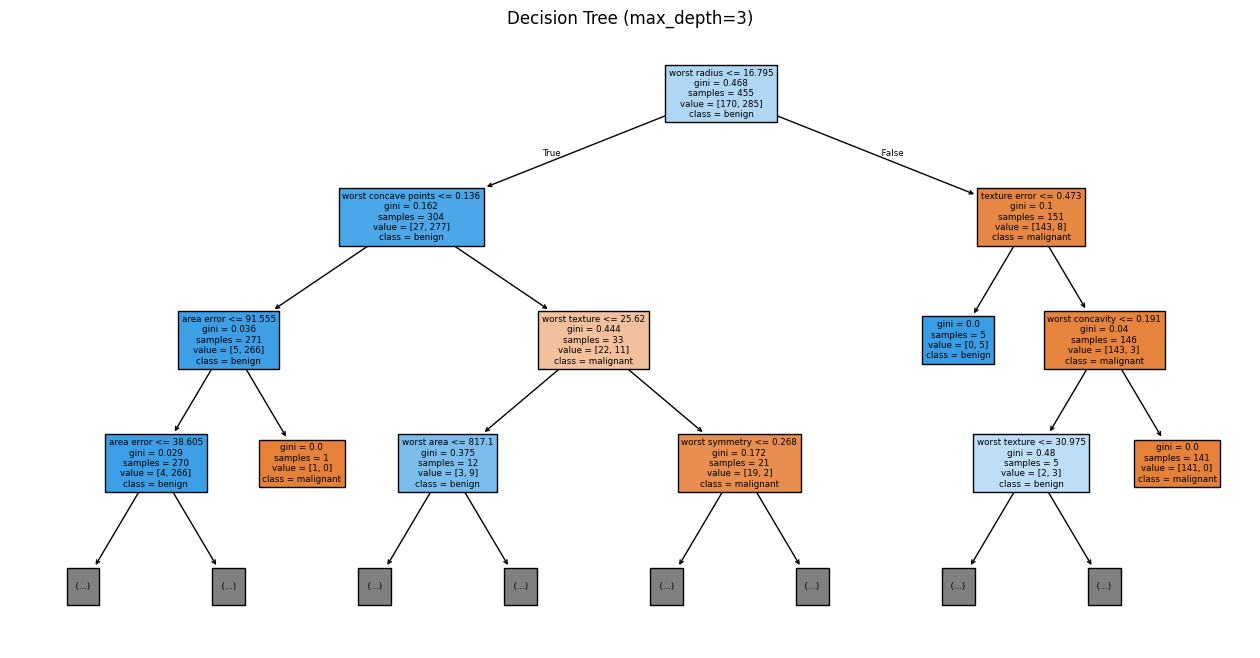

In [4]:
from sklearn import tree

plt.figure(figsize=(16, 8))
tree.plot_tree(
    dt_clf,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    max_depth=3  # chỉ vẽ 3 tầng đầu
)
plt.title("Decision Tree (max_depth=3)")
plt.show()


3. RandomForestClassifier: train, evaluate, feature importance

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=200,      # số cây
    max_depth=None,
    random_state=42,
    n_jobs=-1              # tận dụng tất cả core CPU
)

rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=data.target_names))


Random Forest Accuracy: 0.956140350877193
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



worst perimeter         0.133100
worst area              0.128052
worst concave points    0.108107
mean concave points     0.094414
worst radius            0.090639
mean radius             0.058662
mean perimeter          0.055242
mean area               0.049938
mean concavity          0.046207
worst concavity         0.035357
dtype: float64


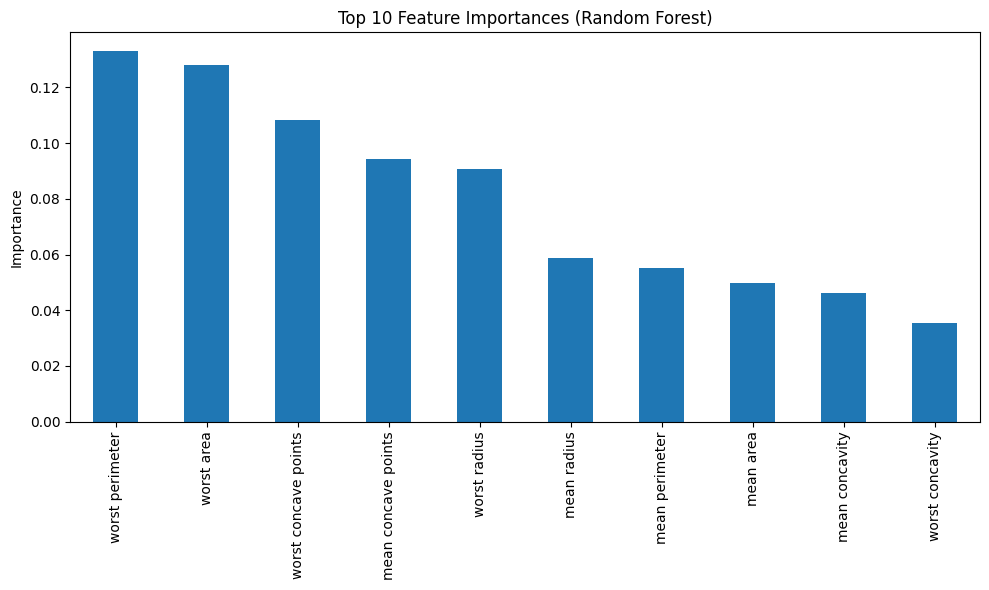

In [6]:
importances = rf_clf.feature_importances_
feat_importances = pd.Series(importances, index=data.feature_names).sort_values(ascending=False)

print(feat_importances.head(10))

plt.figure(figsize=(10, 6))
feat_importances.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


4. So sánh Decision Tree vs Random Forest

In [7]:
models = {
    "Decision Tree": dt_clf,
    "Random Forest": rf_clf
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print(results_df)


           Model  Accuracy
0  Decision Tree  0.912281
1  Random Forest  0.956140
